# Breast Cancer Prediction using Machine Learning


## Import Libraries

In [0]:
## Importing Libraries
# Commented out IPython magic to ensure Python compatibility.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Import models from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


## Load Dataset

In [0]:
from google.colab import files
uploaded = files.upload()
data = pd.read_csv("data.csv")
data.head()

Saving data.csv to data.csv


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Data visualisation and pre-processing

In [0]:
data.drop('id',axis=1,inplace=True) #dropping the 'id' column
data.drop('Unnamed: 32',axis=1,inplace=True)
print("Row, Col", data.shape)# (row,col)

Row, Col (569, 31)


In [0]:
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Explore Data

In [0]:
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [0]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

diagnosis
0    357
1    212
dtype: int64


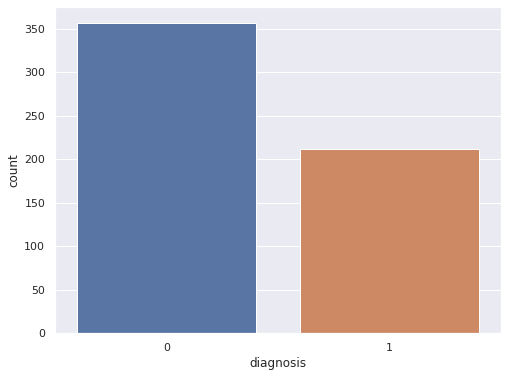

In [0]:
# Setting ploting size
sns.set(rc = {"figure.figsize": (8, 6)})
print(data.groupby('diagnosis').size())
sns.countplot(data['diagnosis'],label="count")
plt.show()


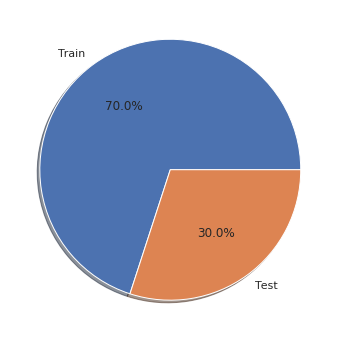

Train set (398, 31)
Test set (171, 31)


In [0]:
#split our data into train and test
traindf, testdf = train_test_split(data, test_size = 0.3)
labels = 'Train', 'Test'
plt.pie([70, 30], labels=labels, autopct='%1.1f%%', shadow=True)
plt.show()
print("Train set", traindf.shape)
print("Test set", testdf.shape)

In [0]:
#split our data into train and test
traindf, testdf = train_test_split(data, test_size = 0.3)
print("Train set", traindf.shape)
print("Test set", testdf.shape)

Train set (398, 31)
Test set (171, 31)


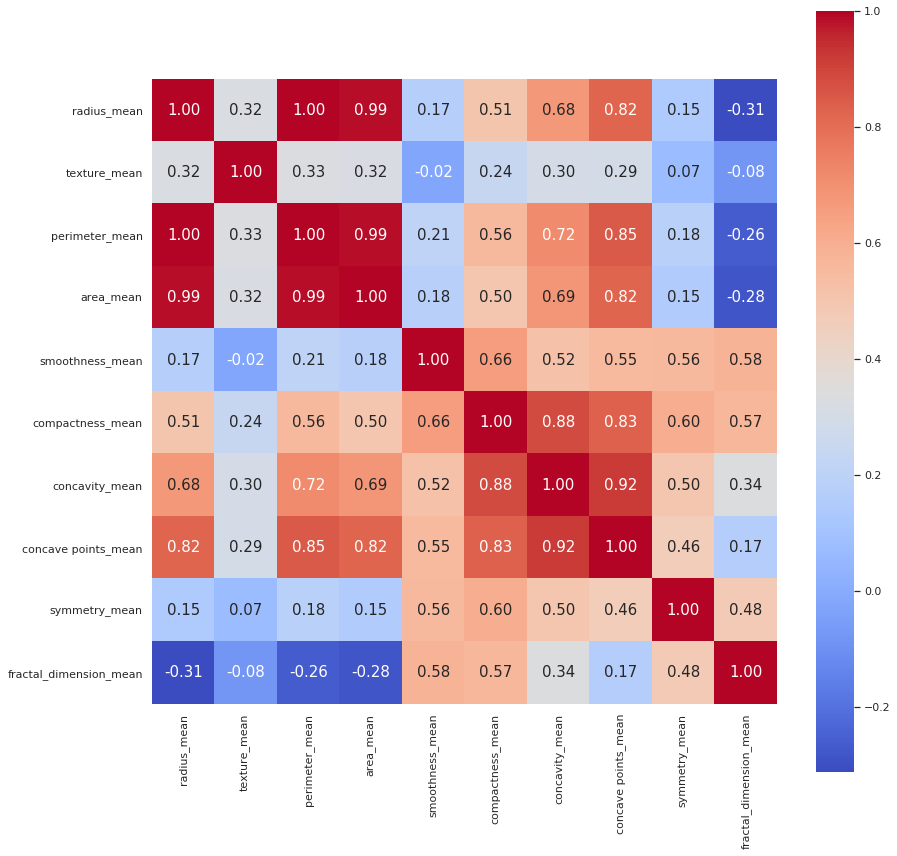

In [0]:
features_mean= list(data.columns[1:11])
corr = data[features_mean].corr() # .corr is used for find corelation
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features_mean, yticklabels= features_mean,
           cmap= 'coolwarm') 
plt.show()

#### Observation

 - the radius, parameter and area are highly correlated as expected from their relation so from these we will use anyone of them
 - compactness_mean, concavity_mean and concavepoint_mean are highly correlated so we will use compactness_mean from here
 - so selected Parameter for use is perimeter_mean, texture_mean, compactness_mean, symmetry_mean

## Model Classification

In [0]:
#Generic function for making a classification model and accessing the performance. 
Y = data['diagnosis'].values
X = data.drop('diagnosis', axis=1).values
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.30, random_state=21)

## Visualization using Diffrent plots

### 1. Boxplot for all Mean values vs Diagnosis

Text(0.5, 1.0, 'diagnosis vs fractal_dimension_mean')

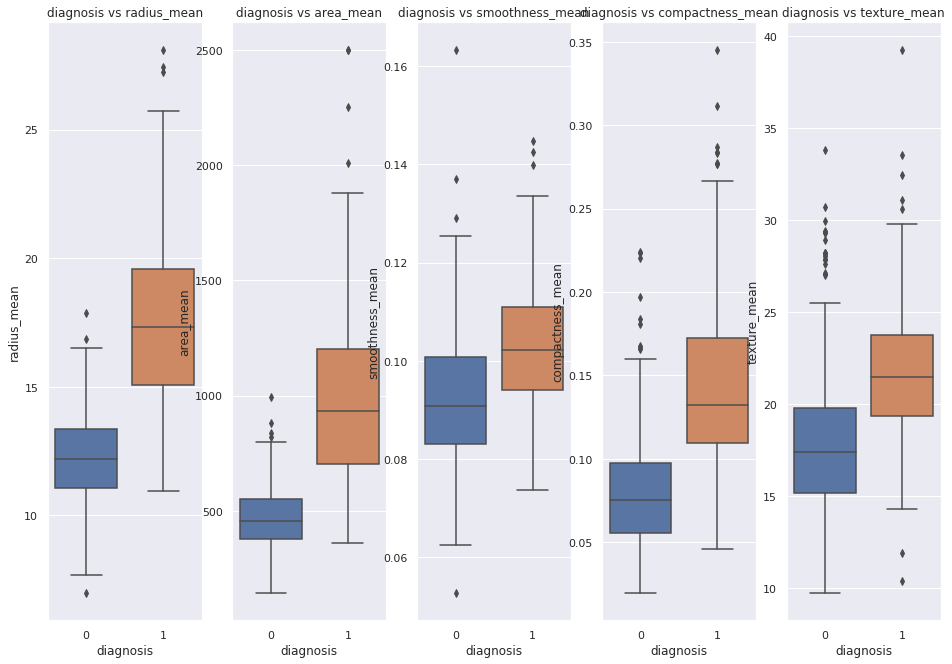

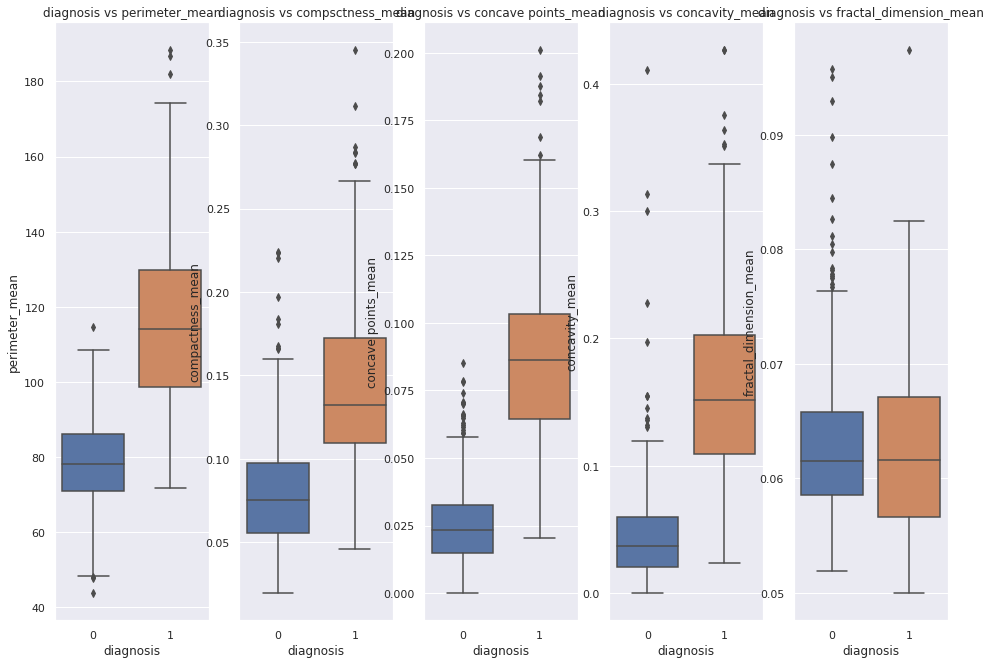

In [0]:
# All Mean vs Diagnosis
fig, (axis1,axis2,axis3, axis4, axis5) = plt.subplots(1,5,figsize=(16,11))

sns.boxplot(x="diagnosis", y="radius_mean", data=data, ax=axis1)
axis1.set_title("diagnosis vs radius_mean")

sns.boxplot(x="diagnosis", y="area_mean", data=data, ax=axis2)
axis2.set_title("diagnosis vs area_mean")

sns.boxplot(x="diagnosis", y="smoothness_mean", data=data, ax=axis3)
axis3.set_title("diagnosis vs smoothness_mean")

sns.boxplot(x="diagnosis", y="compactness_mean", data=data, ax=axis4)
axis4.set_title("diagnosis vs compactness_mean")

sns.boxplot(x="diagnosis", y="texture_mean", data=data, ax=axis5)
axis5.set_title("diagnosis vs texture_mean")
#==============================================================================================================================
fig, (axis1,axis2,axis3, axis4, axis5) = plt.subplots(1,5,figsize=(16,11))

sns.boxplot(x="diagnosis", y="perimeter_mean", data=data, ax=axis1)
axis1.set_title("diagnosis vs perimeter_mean")

sns.boxplot(x="diagnosis", y="compactness_mean", data=data, ax=axis2)
axis2.set_title("diagnosis vs compsctness_mean")

sns.boxplot(x="diagnosis", y="concave points_mean", data=data, ax=axis3)
axis3.set_title("diagnosis vs concave points_mean")

sns.boxplot(x="diagnosis", y="concavity_mean", data=data, ax=axis4)
axis4.set_title("diagnosis vs concavity_mean")

sns.boxplot(x="diagnosis", y="fractal_dimension_mean", data=data, ax=axis5, )
axis5.set_title("diagnosis vs fractal_dimension_mean")

### 2. Violinplot for all Mean Squared Errors values vs Diagnosis

Text(0.5, 1.0, 'diagnosis vs fractal_dimension_se')

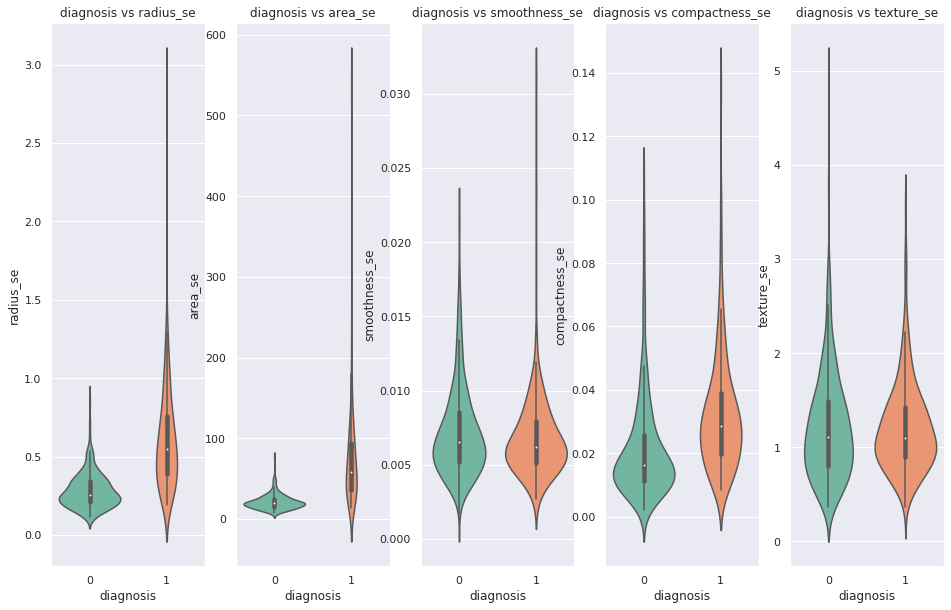

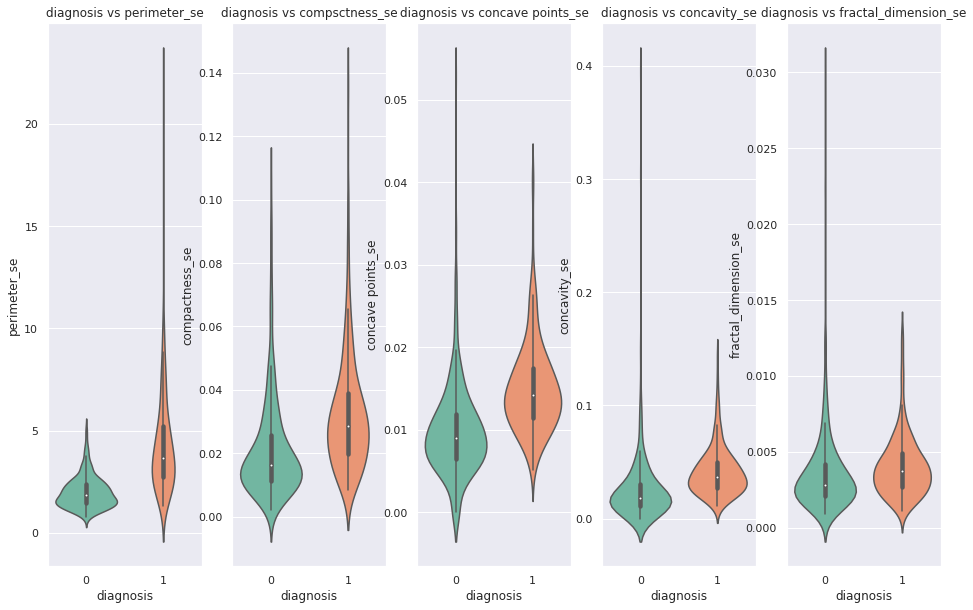

In [0]:
# All se vs Diagnosis
fig, (axis1,axis2,axis3, axis4, axis5) = plt.subplots(1,5,figsize=(16,10))

sns.violinplot(x="diagnosis", y="radius_se", data=data, ax=axis1, palette="Set2")
axis1.set_title("diagnosis vs radius_se")

sns.violinplot(x="diagnosis", y="area_se", data=data, ax=axis2, palette="Set2")
axis2.set_title("diagnosis vs area_se")

sns.violinplot(x="diagnosis", y="smoothness_se", data=data, ax=axis3, palette="Set2")
axis3.set_title("diagnosis vs smoothness_se")

sns.violinplot(x="diagnosis", y="compactness_se", data=data, ax=axis4, palette="Set2")
axis4.set_title("diagnosis vs compactness_se")

sns.violinplot(x="diagnosis", y="texture_se", data=data, ax=axis5, palette="Set2")
axis5.set_title("diagnosis vs texture_se")
#==============================================================================================================================
fig, (axis1,axis2,axis3, axis4, axis5) = plt.subplots(1,5,figsize=(16,10))

sns.violinplot(x="diagnosis", y="perimeter_se", data=data, ax=axis1, palette="Set2")
axis1.set_title("diagnosis vs perimeter_se")

sns.violinplot(x="diagnosis", y="compactness_se", data=data, ax=axis2, palette="Set2")
axis2.set_title("diagnosis vs compsctness_se")

sns.violinplot(x="diagnosis", y="concave points_se", data=data, ax=axis3, palette="Set2")
axis3.set_title("diagnosis vs concave points_se")

sns.violinplot(x="diagnosis", y="concavity_se", data=data, ax=axis4, palette="Set2")
axis4.set_title("diagnosis vs concavity_se")

sns.violinplot(x="diagnosis", y="fractal_dimension_se", data=data, ax=axis5, palette="Set2")
axis5.set_title("diagnosis vs fractal_dimension_se")

### 3. Swarmplot for all Worst values vs Diagnosis

Text(0.5, 1.0, 'diagnosis vs fractal_dimension_worst')

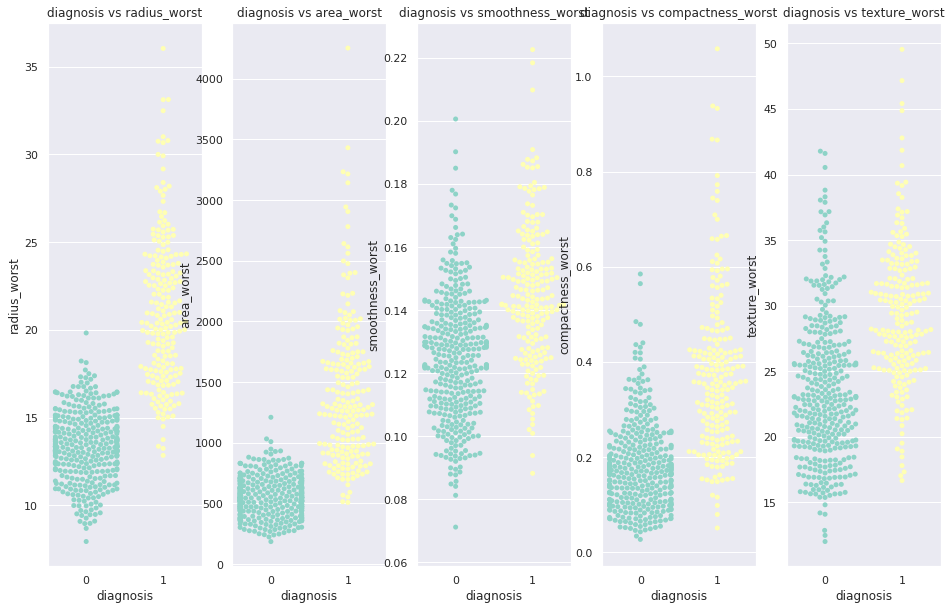

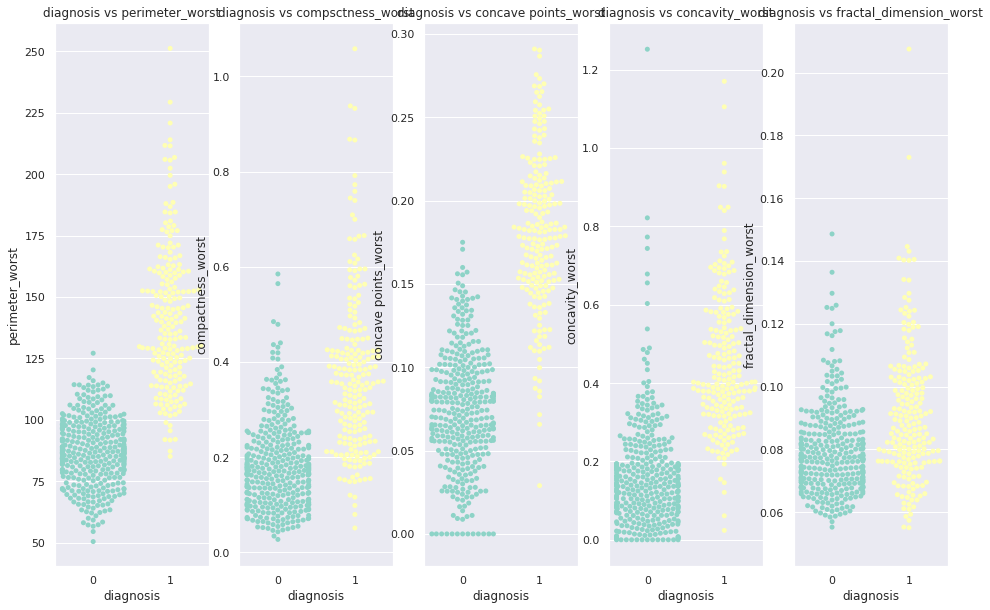

In [0]:
# All Worst vs Diagnosis
fig, (axis1,axis2,axis3, axis4, axis5) = plt.subplots(1,5,figsize=(16,10))

sns.swarmplot(x="diagnosis", y="radius_worst", data=data, ax=axis1, palette="Set3")
axis1.set_title("diagnosis vs radius_worst")

sns.swarmplot(x="diagnosis", y="area_worst", data=data, ax=axis2, palette="Set3")
axis2.set_title("diagnosis vs area_worst")

sns.swarmplot(x="diagnosis", y="smoothness_worst", data=data, ax=axis3, palette="Set3")
axis3.set_title("diagnosis vs smoothness_worst")

sns.swarmplot(x="diagnosis", y="compactness_worst", data=data, ax=axis4, palette="Set3")
axis4.set_title("diagnosis vs compactness_worst")

sns.swarmplot(x="diagnosis", y="texture_worst", data=data, ax=axis5, palette="Set3")
axis5.set_title("diagnosis vs texture_worst")
#==============================================================================================================================
fig, (axis1,axis2,axis3, axis4, axis5) = plt.subplots(1,5,figsize=(16,10))

sns.swarmplot(x="diagnosis", y="perimeter_worst", data=data, ax=axis1, palette="Set3")
axis1.set_title("diagnosis vs perimeter_worst")

sns.swarmplot(x="diagnosis", y="compactness_worst", data=data, ax=axis2, palette="Set3")
axis2.set_title("diagnosis vs compsctness_worst")

sns.swarmplot(x="diagnosis", y="concave points_worst", data=data, ax=axis3, palette="Set3")
axis3.set_title("diagnosis vs concave points_worst")

sns.swarmplot(x="diagnosis", y="concavity_worst", data=data, ax=axis4, palette="Set3")
axis4.set_title("diagnosis vs concavity_worst")

sns.swarmplot(x="diagnosis", y="fractal_dimension_worst", data=data, ax=axis5, palette="Set3")
axis5.set_title("diagnosis vs fractal_dimension_worst")

### Logistic Regression model

In [0]:
log = LogisticRegression(max_iter=1200,solver="lbfgs")
log.fit(X_train, Y_train)
pred_lr = log.predict(X_test)
acc_lr = accuracy_score(Y_test, pred_lr)
print(f"Accuracy of Logistic Regression Model: {round(acc_lr*100, 2)}%")

Accuracy of Logistic Regression Model: 97.66%


### Decision Tree Model

In [0]:
d_tree = DecisionTreeClassifier()
d_tree.fit(X_train, Y_train)
pred_dtree = d_tree.predict(X_test)
acc_dtree = accuracy_score(Y_test, pred_dtree)
print(f"Accuracy of Decision Tree Model: {round(acc_lr*100, 2)}%")

Accuracy of Decision Tree Model: 97.66%


### kNN Model 

In [0]:
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train, Y_train)
pred_knn = KNN.predict(X_test)
acc_knn = accuracy_score(Y_test, pred_knn)
print(f"Accuracy of KNN Model: {round(acc_knn*100, 2)}%")

Accuracy of KNN Model: 92.98%


### SVM Model

In [0]:
svc = SVC()
svc.fit(X_train, Y_train)
pred_svc = svc.predict(X_test)
acc_svc = accuracy_score(Y_test, pred_svc)
print(f"Accuracy of SVC Model: {round(acc_knn*100, 2)}%")

Accuracy of SVC Model: 92.98%


In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
# Improving Accuracy using Boosting in Ml
from xgboost import XGBClassifier
import sklearn.metrics as metrics

xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train,Y_train)
y_pred_xgb = xgb_classifier.predict(X_test)

acc_svc_xgb = metrics.accuracy_score(Y_test, y_pred_xgb)
print(f"Accuracy after Boosting: {acc_svc_xgb*100}%")


Accuracy after Boosting: 96.49122807017544%
